In [90]:
import pandas as pd
import numpy as np

In [91]:
crime = pd.read_csv('FE1_NYPD_Complaint_Data_Historic.csv') # read in the csv %%file

C:\Users\sabri\Anaconda3\envs\ML7331\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [92]:
crime.dtypes

CMPLNT_NUM        int64
CMPLNT_FR_DT     object
CMPLNT_FR_TM     object
CMPLNT_TO_DT     object
CMPLNT_TO_TM     object
                 ...   
Season           object
Daytime          object
GeoCell         float64
GeoCell_X       float64
GeoCell_Y       float64
Length: 38, dtype: object

In [93]:
crime.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,Duration_to_PD,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,77.0,7.0,8.0
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,49.0,9.0,5.0
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,76.0,6.0,8.0
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,40.0,10.0,4.0
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,0.0,December,31.0,2015.0,Short,Winter,Late Night,55.0,5.0,6.0


In [94]:
#Create categorical list of all 68 possible offenses
#4 types of crime: Personal, Property, Statutory/State, and Other

#Personal - Assault, Battery, Abuse, Kidnapping, Rape, Homicide, Harrassment
personal_list = ['ASSAULT', 'BATTERY', 'MURDER', 'MANSLAUGHTER', 'HARRASSMENT', 'KIDNAPPING', 'RAPE', 'SEX', 'HOMICIDE', 'WEAPON', 'WEAPONS', 'PERSON']

#Property - Arson, Theft, Mischief, Burglary, Larceny, Robbery, Forgery, Embezzlement, Shoplifting, Trespass, Fraud/Financial
property_list = ['ARSON', 'THEFT', 'THEF', 'MISCHIEF', 'ROBBERY', 'BURGLARY', 'JOSTLING', 'TOOLS', 'FRAUD', 'FRAUDS', 'FRAUDULENT', 'LARCENY', 'FORGERY', 'STOLEN', 'UNAUTHORIZED', 'TRESPASS']

#Statutory - State-Related offenses, DUI, DWI, Gambling, Loitering, Drug, Traffic, Public Servant/Admin-related crimes
statutory_list = ['DRUGS', 'DRUG', 'SENSBLTY', 'PENAL', 'PUBLIC', 'INTOXICATED', 'TRAFFIC', 'ADMINISTRATIVE', 'GAMBLING', 'PROSTITUTION', 'ALCOHOLIC', 'DISORDERLY']

#Violent vs Non-Violent
violent = personal_list
non_violent = property_list + statutory_list

In [95]:
#Replace all Hyphons and forward slashes with spaces
def string_replace(column):
    
    newstrings = []
    
    for string in column:
        for word in string:
            if word == '-':
                newstrings.append(string.replace('-', ' '))
                break
            elif word == '/':
                newstrings.append(string.replace('/', ' '))
                break
        else:
            newstrings.append(string)
                
    
    return ''.join(newstrings)

def crime_apply(string):
    
    for word in string.split():
        if word in violent:
            return "Violent Crime"
        elif word in non_violent:
            return "Non-Violent Crime"
    else:
        pass

Running the function to create the correct buckets

In [96]:
#Remove NA's before applying Algo.. only removes about 2-3k observations
crime = crime[crime['OFNS_DESC'].notna()] 
crime['OFNS_DESC'] = crime.apply(lambda x: string_replace(x['OFNS_DESC']), axis = 1)
crime['OFNS_DESC_TYPE'] = crime.apply(lambda x: crime_apply(x['OFNS_DESC']), axis = 1)
crime.head(15)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y,OFNS_DESC_TYPE
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,December,31.0,2015.0,NaN,Winter,Late Night,77.0,7.0,8.0,Non-Violent Crime
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON NEGL. MANSLAUGHTER,NaN,NaN,...,December,31.0,2015.0,NaN,Winter,Late Night,49.0,9.0,5.0,Violent Crime
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,December,31.0,2015.0,NaN,Winter,Late Night,76.0,6.0,8.0,Non-Violent Crime
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,December,31.0,2015.0,NaN,Winter,Late Night,40.0,10.0,4.0,Violent Crime
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,December,31.0,2015.0,Short,Winter,Late Night,55.0,5.0,6.0,Violent Crime
5,365661343,12/31/2015,23:18:00,12/31/2015,23:25:00,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",...,December,31.0,2015.0,Short,Winter,Late Night,46.0,6.0,5.0,Violent Crime
6,608231454,12/31/2015,23:15:00,NaN,NaN,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",...,December,31.0,2015.0,NaN,Winter,Late Night,55.0,5.0,6.0,Non-Violent Crime
7,265023856,12/31/2015,23:15:00,12/31/2015,23:15:00,12/31/2015,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,...,December,31.0,2015.0,NaN,Winter,Late Night,87.0,7.0,9.0,Violent Crime
8,989238731,12/31/2015,23:15:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,December,31.0,2015.0,Short,Winter,Late Night,87.0,7.0,9.0,Violent Crime
9,415095955,12/31/2015,23:10:00,12/31/2015,23:10:00,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",...,December,31.0,2015.0,NaN,Winter,Late Night,66.0,6.0,7.0,Non-Violent Crime


In [97]:
#Value Counts by Crime Type
crime['OFNS_DESC_TYPE'].value_counts()

Non-Violent Crime    710987
Violent Crime        333129
Name: OFNS_DESC_TYPE, dtype: int64

In [98]:
#Drop the variables that are extraneous or duplicitous based on EDA
if 'CMPLNT_FR_DT' in crime:
    del crime['CMPLNT_FR_DT']
if 'CMPLNT_FR_TM' in crime:
    del crime['CMPLNT_FR_TM']
if 'CMPLNT_TO_DT' in crime:
    del crime['CMPLNT_TO_DT']
if 'CMPLNT_TO_TM' in crime:
    del crime['CMPLNT_TO_TM']
if 'PARKS_NM' in crime:
    del crime['PARKS_NM']
if 'HADEVELOPT' in crime:
    del crime['HADEVELOPT']  
if 'End_Dt_Tm' in crime:
    del crime['End_Dt_Tm']  
if 'CMPLNT_NUM' in crime:
    del crime['CMPLNT_NUM']
if 'KY_CD' in crime:
    del crime['KY_CD']
if 'RPT_DT' in crime:
    del crime['RPT_DT']
if 'PD_CD' in crime:
    del crime['PD_CD']
if 'PD_DESC' in crime:
    del crime['PD_DESC']
if 'X_COORD_CD' in crime:
    del crime['X_COORD_CD']
if 'Y_COORD_CD' in crime:
    del crime['Y_COORD_CD']
if 'Latitude' in crime:
    del crime['Latitude']
if 'Longitude' in crime:
    del crime['Longitude']
if 'Lat_Lon' in crime:
    del crime['Lat_Lon']
if 'OFNS_DESC' in crime:
    del crime['OFNS_DESC']

In [99]:
#dropping any remaining NANs
crime = crime.dropna() 

In [100]:
crime.isnull().values.any()

False

In [101]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586995 entries, 4 to 1048573
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CRM_ATPT_CPTD_CD   586995 non-null  object 
 1   LAW_CAT_CD         586995 non-null  object 
 2   JURIS_DESC         586995 non-null  object 
 3   BORO_NM            586995 non-null  object 
 4   ADDR_PCT_CD        586995 non-null  float64
 5   LOC_OF_OCCUR_DESC  586995 non-null  object 
 6   PREM_TYP_DESC      586995 non-null  object 
 7   Start_Dt_Tm        586995 non-null  object 
 8   Day_Name           586995 non-null  object 
 9   Duration           586995 non-null  float64
 10  Duration_to_PD     586995 non-null  float64
 11  Month              586995 non-null  object 
 12  Day                586995 non-null  float64
 13  Year               586995 non-null  float64
 14  Duration_lbl       586995 non-null  object 
 15  Season             586995 non-null  object 
 16  D

In [102]:
# replace the current Violent Crime classification atribute with something slightly more intuitive and readable
crime['NonViolent'] = crime.OFNS_DESC_TYPE=='Non-Violent Crime' 
crime.NonViolent = crime.NonViolent.astype(np.int)

In [103]:
# perform one-hot encoding of the categorical data on 'JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC',
#'ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime'
tmp_df = pd.get_dummies(crime.JURIS_DESC,prefix='JURIS_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.BORO_NM,prefix='BORO_NM')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.LOC_OF_OCCUR_DESC,prefix='LOC_OF_OCCUR_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.ADDR_PCT_CD,prefix='ADDR_PCT_CD')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.PREM_TYP_DESC,prefix='PREM_TYP_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Day_Name,prefix='Day_Name')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Month,prefix='Month')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Duration_lbl,prefix='Duration_lbl')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Season,prefix='Season')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='Daytime')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

In [104]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586995 entries, 4 to 1048573
Columns: 229 entries, CRM_ATPT_CPTD_CD to Daytime_Night
dtypes: float64(8), int32(1), object(13), uint8(207)
memory usage: 216.6+ MB


In [105]:
#Now we drop the original variables
if 'JURIS_DESC' in crime:    
    del crime['JURIS_DESC'] # get rid of the original category as it is now one-hot encoded
    
if 'BORO_NM' in crime:    
    del crime['BORO_NM'] # get rid of the original category as it is now one-hot encoded

if 'LOC_OF_OCCUR_DESC' in crime:    
    del crime['LOC_OF_OCCUR_DESC'] # get rid of the original category as it is now one-hot encoded
    
if 'ADDR_PCT_CD' in crime:    
    del crime['ADDR_PCT_CD'] # get rid of the original category as it is now one-hot encoded
    
if 'PREM_TYP_DESC' in crime:    
    del crime['PREM_TYP_DESC'] # get rid of the original category as it is now one-hot encoded
    
if 'Day_Name' in crime:    
    del crime['Day_Name'] # get rid of the original category as it is now one-hot encoded
    
if 'Month' in crime:    
    del crime['Month'] # get rid of the original category as it is now one-hot encoded
    
if 'Duration_lbl' in crime:    
    del crime['Duration_lbl'] # get rid of the original category as it is now one-hot encoded
    
if 'Season' in crime:    
    del crime['Season'] # get rid of the original category as it is now one-hot encoded
    
if 'Daytime' in crime:    
    del crime['Daytime'] # get rid of the original category as it is now one-hot encoded

In [106]:
#Drop categories not using
if 'CRM_ATPT_CPTD_CD' in crime:    
    del crime['CRM_ATPT_CPTD_CD']
    
if 'LAW_CAT_CD' in crime:
    del crime['LAW_CAT_CD']
    
if 'Start_Dt_Tm' in crime:
    del crime['Start_Dt_Tm']

In [107]:
pd.set_option('display.max_rows', 30)
crime.dtypes

Duration                 float64
Duration_to_PD           float64
Day                      float64
Year                     float64
GeoCell                  float64
                          ...   
Daytime_Early Morning      uint8
Daytime_Evening            uint8
Daytime_Late Night         uint8
Daytime_Morning            uint8
Daytime_Night              uint8
Length: 216, dtype: object

In [108]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'OFNS_DESC_TYPE' in crime:
    y = crime['OFNS_DESC_TYPE'].values # get the labels we want
    del crime['OFNS_DESC_TYPE'] # get rid of the class label
    X = crime.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [109]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

C:\Users\sabri\Anaconda3\envs\ML7331\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


====Iteration 0  ====
accuracy 0.789146415216484
confusion matrix
 [[80894   162]
 [24592 11751]]


C:\Users\sabri\Anaconda3\envs\ML7331\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


====Iteration 1  ====
accuracy 0.8999991482039881
confusion matrix
 [[81133     0]
 [11740 24526]]


C:\Users\sabri\Anaconda3\envs\ML7331\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


====Iteration 2  ====
accuracy 0.9723932912546104
confusion matrix
 [[80988     0]
 [ 3241 33170]]


In [110]:
# here we can change some of the parameters interactively
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None,solver='liblinear') # get object
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05),__manual=True)

interactive(children=(FloatSlider(value=2.451, description='cost', max=5.0, min=0.001, step=0.05), Output()), …

<function __main__.lr_explor(cost)>

Grouping the data into predictors and response

In [15]:
X = crime[['JURIS_DESC','BORO_NM','ADDR_PCT_CD','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','Day_Name','Duration','Duration_to_PD','Month','Day','Year','Duration_lbl','Season','Daytime','GeoCell','GeoCell_X','GeoCell_Y']]
y = crime[['OFNS_DESC_TYPE']]

In [16]:
#dummy variables for categoricals
cat_vars=['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(X[var], prefix=var)
    data1=X.join(cat_list)
    X=data1

data_vars=X.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
#keep only the non-categoricals and the new dummy variables
X = X[to_keep]
X.columns.values

array(['Duration', 'Duration_to_PD', 'Day', 'Year', 'GeoCell',
       'GeoCell_X', 'GeoCell_Y', 'JURIS_DESC_AMTRACK',
       'JURIS_DESC_DEPT OF CORRECTIONS', 'JURIS_DESC_HEALTH & HOSP CORP',
       'JURIS_DESC_LONG ISLAND RAILRD', 'JURIS_DESC_METRO NORTH',
       'JURIS_DESC_N.Y. HOUSING POLICE', 'JURIS_DESC_N.Y. POLICE DEPT',
       'JURIS_DESC_N.Y. STATE PARKS', 'JURIS_DESC_N.Y. STATE POLICE',
       'JURIS_DESC_N.Y. TRANSIT POLICE',
       'JURIS_DESC_NEW YORK CITY SHERIFF OFFICE', 'JURIS_DESC_NYC PARKS',
       'JURIS_DESC_NYS DEPT TAX AND FINANCE', 'JURIS_DESC_OTHER',
       'JURIS_DESC_POLICE DEPT NYC', 'JURIS_DESC_PORT AUTHORITY',
       'JURIS_DESC_STATN IS RAPID TRANS',
       'JURIS_DESC_TRI-BORO BRDG TUNNL', 'JURIS_DESC_U.S. PARK POLICE',
       'BORO_NM_BRONX', 'BORO_NM_BROOKLYN', 'BORO_NM_MANHATTAN',
       'BORO_NM_QUEENS', 'BORO_NM_STATEN ISLAND',
       'LOC_OF_OCCUR_DESC_FRONT OF', 'LOC_OF_OCCUR_DESC_INSIDE',
       'LOC_OF_OCCUR_DESC_OPPOSITE OF', 'LOC_OF_OCCUR_DESC_

In [17]:
#in this code chunk, I held back scaling the variables.  I'll need to do that after I split the dataset

#use one hot encoding dummy variable calls from above
from sklearn.preprocessing import StandardScaler, OneHotEncoder
X = crime[['JURIS_DESC','BORO_NM','ADDR_PCT_CD','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','Day_Name',
           'Duration','Duration_to_PD','Month','Day','Year','Duration_lbl','Season','Daytime',
           'GeoCell','GeoCell_X','GeoCell_Y']]
y = crime[['OFNS_DESC_TYPE']]

columns_to_encode = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
columns_to_scale = ['Duration','Duration_to_PD']
columns_no_change = ['Day','Year','GeoCell','GeoCell_X','GeoCell_Y']

df_existing = X[columns_no_change]
existing_cols = df_existing.to_numpy()

#encoder and scaler
#scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False)

#scale and encode separate columns
#scaled_columns = scaler.fit_transform(X[columns_to_scale])
encoded_columns = ohe.fit_transform(X[columns_to_encode])

#concatenate processed columns back together
X_np = np.concatenate([columns_to_scale,encoded_columns,existing_cols],axis=1)


AxisError: axis 1 is out of bounds for array of dimension 1

In [18]:
#convert the numpy array back to a pandas dataframe
df1 = pd.DataFrame(X_np)
df1

,0,1,2,3,4,5,6,7,8,9,...,204,205,206,207,208,209,210,211,212,213
0,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,55.0,5.0,6.0
1,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,46.0,6.0,5.0
2,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,87.0,7.0,9.0
3,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,77.0,7.0,8.0
4,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,55.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586990,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,27.0,7.0,3.0
586991,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,65.0,5.0,7.0
586992,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,77.0,7.0,8.0
586993,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,37.0,7.0,4.0


In [19]:
#get the column names back to the dataframe
feature_names = ohe.get_feature_names().tolist()
#df = pd.DataFrame(feature_names)
#df = df.T
col_names = columns_to_scale+feature_names+columns_no_change
col_names
df1.columns = col_names
X = df1
X

,Duration,Duration_to_PD,x0_AMTRACK,x0_DEPT OF CORRECTIONS,x0_HEALTH & HOSP CORP,x0_LONG ISLAND RAILRD,x0_METRO NORTH,x0_N.Y. HOUSING POLICE,x0_N.Y. POLICE DEPT,x0_N.Y. STATE PARKS,...,x9_Early Morning,x9_Evening,x9_Late Night,x9_Morning,x9_Night,Day,Year,GeoCell,GeoCell_X,GeoCell_Y
0,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,55.0,5.0,6.0
1,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,46.0,6.0,5.0
2,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,87.0,7.0,9.0
3,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,77.0,7.0,8.0
4,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,55.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586990,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,27.0,7.0,3.0
586991,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,65.0,5.0,7.0
586992,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,77.0,7.0,8.0
586993,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,37.0,7.0,4.0


Code Source:  https://scikit-learn.org/stable/auto_examples/classification/plot_classification_probability.html#sphx-glr-auto-examples-classification-plot-classification-probability-py

### PCA on dataset

In [20]:
import numpy as np
import pandas as pd

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [24]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.03522549e-02, 1.66606974e-02, 1.43258563e-02, 1.34501162e-02,
       1.19478986e-02, 1.15762245e-02, 1.12460099e-02, 1.11780906e-02,
       1.09667063e-02, 1.06309342e-02, 8.50494027e-03, 7.74046909e-03,
       7.55910980e-03, 7.50068163e-03, 7.21351329e-03, 7.01759852e-03,
       6.52821037e-03, 6.33900955e-03, 6.27277599e-03, 6.20864514e-03,
       6.15396159e-03, 5.97511672e-03, 5.89361666e-03, 5.84007815e-03,
       5.77961645e-03, 5.67474662e-03, 5.57931477e-03, 5.54480751e-03,
       5.49752977e-03, 5.47639515e-03, 5.47374332e-03, 5.44420758e-03,
       5.38405955e-03, 5.36793825e-03, 5.28711402e-03, 5.27258589e-03,
       5.26207797e-03, 5.22059268e-03, 5.17539584e-03, 5.15542695e-03,
       5.13768237e-03, 5.11324163e-03, 5.09485574e-03, 5.08276862e-03,
       5.06762082e-03, 5.04604680e-03, 5.02274317e-03, 5.01178320e-03,
       4.99581778e-03, 4.97077333e-03, 4.94843870e-03, 4.94260875e-03,
       4.93407445e-03, 4.92523922e-03, 4.91992724e-03, 4.91806270e-03,
      

In [25]:
X_train

array([[ 3.17279023e+00, -1.26934778e+00, -5.81527060e-01, ...,
        -2.97186769e-14, -2.86142781e-14,  3.94419302e-15],
       [ 3.20653291e+00,  2.02903458e+00,  1.61795246e+00, ...,
         6.32492435e-15, -2.96860545e-15, -1.12851318e-15],
       [ 3.18417722e+00, -1.59345030e+00, -1.60075837e+00, ...,
        -2.60067686e-15,  7.88684038e-15,  1.39061976e-15],
       ...,
       [-1.48253621e+00, -3.06717617e+00,  3.19501120e+00, ...,
         9.01814886e-17,  9.19381192e-17, -1.35261853e-16],
       [ 1.61853079e+00, -1.20659906e+00, -1.06614760e+00, ...,
        -1.38813126e-17, -7.13939725e-17,  1.26438715e-16],
       [ 7.97755951e-01, -3.38866124e+00,  4.24890071e+00, ...,
        -2.45807312e-16,  8.96517013e-18,  5.85372284e-17]])

In [26]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=50)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# classifier = RandomForestClassifier(max_depth=2, random_state=0)
# classifier.fit(X_train, y_train)

# # Predicting the Test set results
# y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

In [ ]:
print(accuracy_score(y_test, y_pred))

In [28]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets

In [29]:
n_features = X.shape[1]

C = .5

In [30]:
# Create different classifiers.
classifiers = {
#     'L1 logistic': LogisticRegression(C=C, penalty='l1',
#                                       solver='liblinear',
#                                       multi_class='auto',
#                                       max_iter=100),
#     'L2 logistic': LogisticRegression(C=C, penalty='l1',
#                                                     solver='saga',
#                                                     multi_class='auto',
#                                                     max_iter=100),
    'Linear SVC': SVC(kernel='linear', C=C, probability=True,
                     random_state=0),
}

n_classifiers = len(classifiers)

In [ ]:
for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

In [22]:
#https://scikit-learn.org/stable/auto_examples/classification/plot_classification_probability.html#sphx-glr-auto-examples-classification-plot-classification-probability-py

In [23]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets

In [24]:
n_features = X.shape[1]

C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

In [25]:
# Create different classifiers.
classifiers = {
    'L1 logistic': LogisticRegression(C=C, penalty='l1',
                                      solver='liblinear',
                                      multi_class='auto',
                                      max_iter=10000),
#    'L2 logistic (Multinomial)': LogisticRegression(C=C, penalty='l2',
#                                                    solver='saga',
#                                                    multi_class='multinomial',
#                                                    max_iter=10000),
#    'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2',
#                                            solver='saga',
#                                            multi_class='ovr',
#                                            max_iter=10000),
#    'Linear SVC': SVC(kernel='linear', C=C, probability=True,
#                      random_state=0),
#    'GPC': GaussianProcessClassifier(kernel)
}

n_classifiers = len(classifiers)

In [26]:
plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 214)
yy = np.linspace(1, 5, 214).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

<Figure size 432x144 with 0 Axes>

In [27]:
for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))



C:\Users\sabri\Anaconda3\envs\ML7331\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy (train) for L1 logistic: 73.3% 


In [37]:
y

,OFNS_DESC_TYPE
4,Violent Crime
5,Violent Crime
8,Violent Crime
10,Non-Violent Crime
11,Non-Violent Crime
...,...
1048564,Non-Violent Crime
1048569,Non-Violent Crime
1048570,Non-Violent Crime
1048571,Violent Crime


In [29]:
    # View probabilities:
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='w', edgecolor='k')

ValueError: X has 2 features per sample; expecting 214

NameError: name 'imshow_handle' is not defined

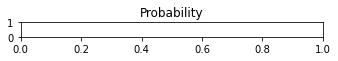

In [30]:
ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()